In [88]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

def DELTA_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    return N(d1)

def DELTA_PUT(S, K, T, r, sigma):
    return DELTA_CALL(S, K, T, r, sigma)-1

def my_metric_put(S, K, T, r, sigma):
    return S * DELTA_PUT(S, K, T, r, sigma)

def my_metric_call(S, K, T, r, sigma):
    return S * DELTA_CALL(S, K, T, r, sigma)

def my_other_metric_put(S, K, T, r, sigma):
    return S/K * DELTA_PUT(S, K, T, r, sigma)

In [40]:
BS_PUT(9,10,0.1,0.01,0.44)

1.1628055228931036

In [41]:
DELTA_PUT(10,10,0.1,0.01,0.44)

-0.46940838834803167

In [42]:
my_metric(11,10,0.1,0.01,0.44)

-2.454147931144459

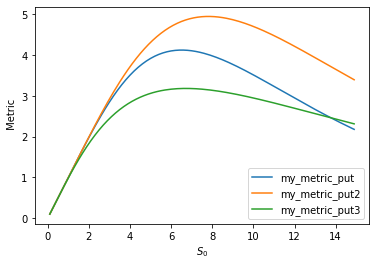

In [94]:

K = 10
r = 0.1
T = 0.5
sigma = 0.84

S = np.arange(0.1,15,0.1)

puts = [-my_metric_put(s, K, T, r, sigma) for s in S]
puts2 = [-my_metric_put(s, K*1.2, T, r, sigma) for s in S]
puts3 = [-my_metric_put(s, K, T*2, r, sigma) for s in S]

plt.plot(S, puts, label='my_metric_put')
plt.plot(S, puts2, label='my_metric_put2')
plt.plot(S, puts3, label='my_metric_put3')
plt.xlabel('$S_0$')
plt.ylabel(' Metric')
plt.legend()


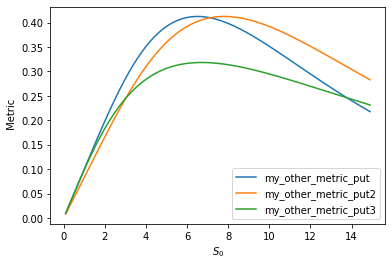

In [95]:
puts = [-my_other_metric_put(s, K, T, r, sigma) for s in S]
puts2 = [-my_other_metric_put(s, K*1.2, T, r, sigma) for s in S]
puts3 = [-my_other_metric_put(s, K, T*2, r, sigma) for s in S]

plt.plot(S, puts, label='my_other_metric_put')
plt.plot(S, puts2, label='my_other_metric_put2')
plt.plot(S, puts3, label='my_other_metric_put3')
plt.xlabel('$S_0$')
plt.ylabel(' Metric')
plt.legend()
